# Housing

In [1]:
import geopandas as gpd
from shapely.geometry import box, Point
from contextily import Place
import contextily as ctx
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# Data Prep

## Importing and overlaying

In [87]:
housing_nm = gpd.read_file("../../data/download/housing_bytracts2018.zip")
print(housing_nm.head())

  STATEFP COUNTYFP TRACTCE   NAME            NAMELSAD  MTFCC  Shape_Leng  \
0      35      045  000302   3.02   Census Tract 3.02  G5020    0.071322   
1      35      057  963600   9636   Census Tract 9636  G5020    2.714043   
2      35      057  963700   9637   Census Tract 9637  G5020    4.365856   
3      35      001  004402  44.02  Census Tract 44.02  G5020    0.100807   
4      35      001  004501  45.01  Census Tract 45.01  G5020    0.075078   

   Shape_Area          GEOID_Data     GEOIDLNUM  ...  V250K_300K  V300K_400K  \
0    0.000200  14000US35045000302  3.504500e+10  ...          64           0   
1    0.279763  14000US35057963600  3.505796e+10  ...         168         113   
2    0.541072  14000US35057963700  3.505796e+10  ...           3          24   
3    0.000504  14000US35001004402  3.500100e+10  ...          98          59   
4    0.000252  14000US35001004501  3.500100e+10  ...           0           6   

   V400K_500K  V500K_750K  V750K_1M  V_1M_PLUS   tract  county

In [3]:
housing_nm.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'NAME', 'NAMELSAD', 'MTFCC',
       'Shape_Leng', 'Shape_Area', 'GEOID_Data', 'GEOIDLNUM', 'HOUSING_UN',
       'OCC_HU', 'VAC_HU', 'OWNED', 'RENTED', 'NO_BDRMS', 'BEDRM_1', 'BEDRM_2',
       'BEDRM_3', 'BEDRM_4', 'BEDRM_5_PL', 'MED_C_RENT', 'MED_G_RENT',
       'SAME_HOUSE', 'MED_YR_BLT', 'BLT_2000_P', 'B1990_1999', 'B1980_1989',
       'B1970_1979', 'B1960_1969', 'B1950_1959', 'B1940_1949', 'B1939_EARL',
       'MED_HM_VAL', 'V_LT_50K', 'V50K_100K', 'V100K_150K', 'V150K_200K',
       'V200K_250K', 'V250K_300K', 'V300K_400K', 'V400K_500K', 'V500K_750K',
       'V750K_1M', 'V_1M_PLUS', 'tract', 'county', 'state', 'geometry'],
      dtype='object')

<Axes: >

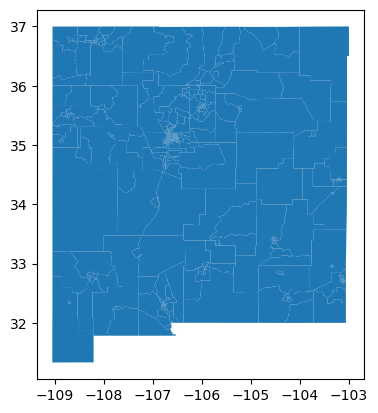

In [88]:
housing_nm.plot()

In [128]:
housing_nm.loc[housing_nm.MED_HM_VAL < 0, "MED_HM_VAL"] = 0

In [129]:
housing_nm.loc[housing_nm.MED_HM_VAL < 0, "MED_HM_VAL"]

Series([], Name: MED_HM_VAL, dtype: int64)

In [134]:
housing_nm.loc[housing_nm.MED_C_RENT < 0, "MED_C_RENT"] = 0
housing_nm.loc[housing_nm.MED_G_RENT < 0, "MED_G_RENT"] = 0
print(housing_nm.loc[housing_nm.MED_C_RENT < 0])
print(housing_nm.loc[housing_nm.MED_G_RENT < 0])

Empty GeoDataFrame
Columns: [STATEFP, COUNTYFP, TRACTCE, NAME, NAMELSAD, MTFCC, Shape_Leng, Shape_Area, GEOID_Data, GEOIDLNUM, HOUSING_UN, OCC_HU, VAC_HU, OWNED, RENTED, NO_BDRMS, BEDRM_1, BEDRM_2, BEDRM_3, BEDRM_4, BEDRM_5_PL, MED_C_RENT, MED_G_RENT, SAME_HOUSE, MED_YR_BLT, BLT_2000_P, B1990_1999, B1980_1989, B1970_1979, B1960_1969, B1950_1959, B1940_1949, B1939_EARL, MED_HM_VAL, V_LT_50K, V50K_100K, V100K_150K, V150K_200K, V200K_250K, V250K_300K, V300K_400K, V400K_500K, V500K_750K, V750K_1M, V_1M_PLUS, tract, county, state, geometry]
Index: []

[0 rows x 49 columns]
Empty GeoDataFrame
Columns: [STATEFP, COUNTYFP, TRACTCE, NAME, NAMELSAD, MTFCC, Shape_Leng, Shape_Area, GEOID_Data, GEOIDLNUM, HOUSING_UN, OCC_HU, VAC_HU, OWNED, RENTED, NO_BDRMS, BEDRM_1, BEDRM_2, BEDRM_3, BEDRM_4, BEDRM_5_PL, MED_C_RENT, MED_G_RENT, SAME_HOUSE, MED_YR_BLT, BLT_2000_P, B1990_1999, B1980_1989, B1970_1979, B1960_1969, B1950_1959, B1940_1949, B1939_EARL, MED_HM_VAL, V_LT_50K, V50K_100K, V100K_150K, V150K_20

In [135]:
abq_shp = gpd.read_file("../../data/local/abq_shp.gpkg")
housing_abq = housing_nm.overlay(
    abq_shp,
    how="intersection"
)

In [136]:
vtr_shp = gpd.read_file("../../data/local/vtr_shp.gpkg")
housing_vtr = housing_nm.overlay(
    vtr_shp,
    how="intersection"
)

<Axes: >

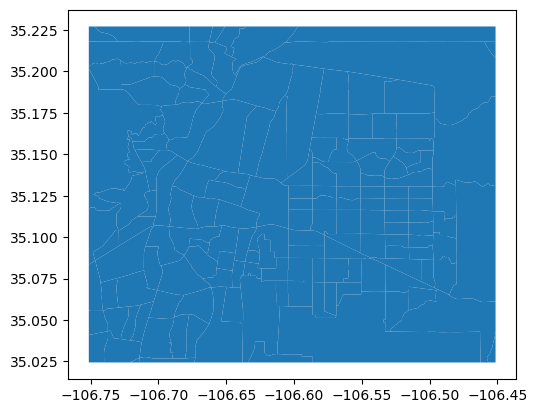

In [137]:
housing_abq.plot()

In [140]:
housing_nm.attrs = {"name": "NM Housing"}
housing_abq.attrs = {"name": "ABQ Housing"}
housing_vtr.attrs = {"name": "VTR Housing"}

In [ ]:
housing_nm['OWNED_P'] = housing_nm.OWNED / (housing_nm.OWNED + housing_nm.RENTED)

housing_abq['OWNED_P'] = housing_abq.OWNED / (housing_abq.OWNED + 
                                              housing_abq.RENTED)
housing_vtr['OWNED_P'] = housing_vtr.OWNED / (housing_vtr.OWNED + 
                                              housing_vtr.RENTED)

In [203]:
housing_nm['AVAILABILITY'] = housing_nm.VAC_HU / housing_nm.OCC_HU
housing_abq['AVAILABILITY'] = housing_abq.VAC_HU / housing_abq.OCC_HU
housing_vtr['AVAILABILITY'] = housing_vtr.VAC_HU / housing_vtr.OCC_HU

In [61]:
pois = gpd.read_file("../../data/local/poi.gpkg")
rois = gpd.read_file("../../data/local/rois.gpkg")

# Basic facts

>Total Units

In [199]:
import pandas as pd

In [204]:
unit_summary = pd.DataFrame()
unit_summary['Location'] = ['New Mexico', 'Albuquerque', 'VTR']

unit_summary['Total'] = [
    housing_nm.HOUSING_UN.sum(), 
    housing_abq.HOUSING_UN.sum(), 
    housing_vtr.HOUSING_UN.sum()
] 
unit_summary['Owned'] = [
    housing_nm.OWNED.sum(), 
    housing_abq.OWNED.sum(), 
    housing_vtr.OWNED.sum()
]
unit_summary['Rented'] = [
    housing_nm.RENTED.sum(), 
    housing_abq.RENTED.sum(), 
    housing_vtr.RENTED.sum()
]
unit_summary['Occupied'] = [
    housing_nm.OCC_HU.sum(), 
    housing_abq.OCC_HU.sum(), 
    housing_vtr.OCC_HU.sum()
]
unit_summary['Vacant'] = [
    housing_nm.VAC_HU.sum(), 
    housing_abq.VAC_HU.sum(), 
    housing_vtr.VAC_HU.sum()
]
unit_summary["Ownership_est"] = [
    housing_nm.OWNED_P.mean(), 
    housing_abq.OWNED_P.mean(), 
    housing_vtr.OWNED_P.mean()
]
unit_summary["Available"] = [
    housing_nm.AVAILABILITY.mean(), 
    housing_abq.AVAILABILITY.mean(), 
    housing_vtr.AVAILABILITY.mean()
]
unit_summary

,Location,Total,Owned,Rented,Occupied,Vacant,Ownership_est,Available
0,New Mexico,932818,524242,251409,775651,157167,0.678451,0.231988
1,Albuquerque,298250,170968,100402,271370,26880,0.630709,0.100518
2,VTR,23043,16974,4491,21465,1578,0.799484,0.073195


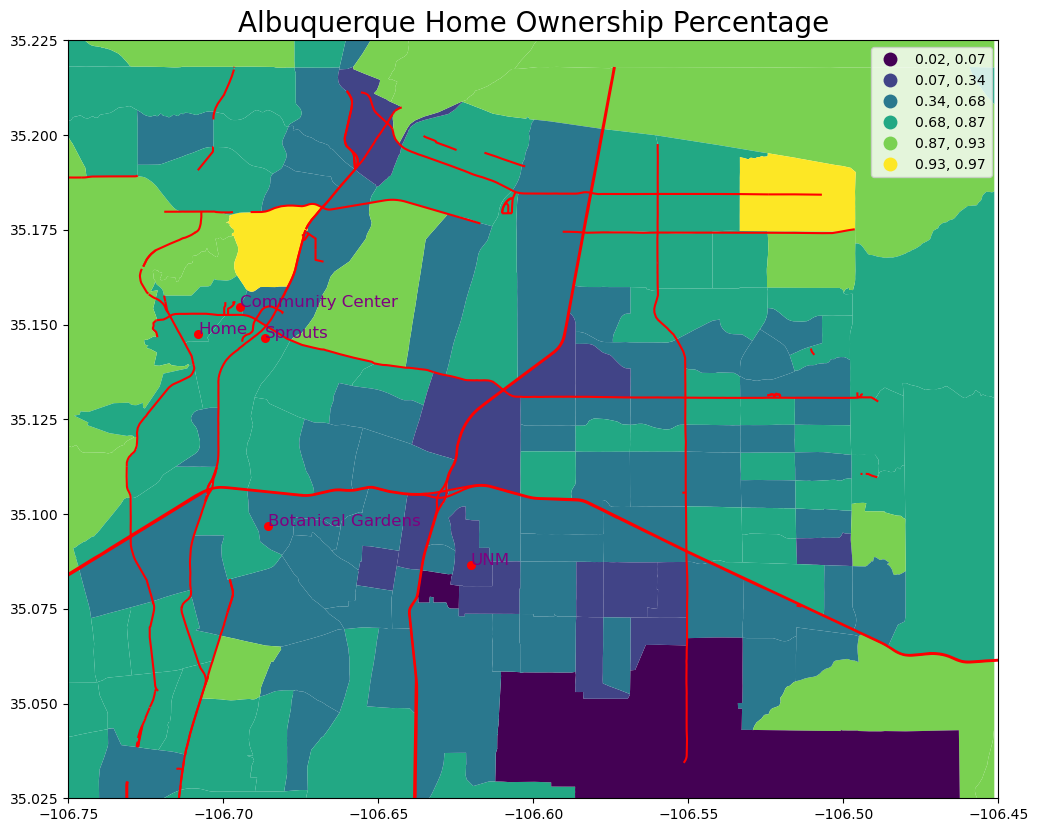

In [233]:
ax = housing_abq.plot(
    figsize=(12,12),
    column='OWNED_P',
    cmap='viridis',
    legend=True, 
    scheme="Percentiles", 
)
rois.plot(ax=ax, color='red')
pois.plot(ax=ax, markersize=30, color='red')
texts = []

for x, y, label in zip(pois.geometry.x, pois.geometry.y, pois['name']): 
    texts.append(plt.text(x, y, label, fontsize=12, color='purple'))
plt.xlim(-106.75, -106.45)
plt.ylim(35.025,35.225)
plt.title("Albuquerque Home Ownership Percentage", fontsize=20);

In [234]:
housing_abq.to_file("../../data/local/housing_abq.gpkg", driver="GPKG")
housing_nm.to_file("../../data/local/housing_nm.gpkg", driver="GPKG")
housing_vtr.to_file("../../data/local/housing_vtr.gpkg", driver="GPKG")

In [40]:
val_cols = [c for c in housing_abq.columns 
            if c.startswith('V')
            if c != 'VAC_HU']
val_cols.extend(['MED_HM_VAL', 'geometry'])
val_cols

['V_LT_50K',
 'V50K_100K',
 'V100K_150K',
 'V150K_200K',
 'V200K_250K',
 'V250K_300K',
 'V300K_400K',
 'V400K_500K',
 'V500K_750K',
 'V750K_1M',
 'V_1M_PLUS',
 'MED_HM_VAL',
 'geometry']

In [44]:
hv_abq = housing_abq[val_cols].head()
print(hv_abq.head(2))

   V_LT_50K  V50K_100K  V100K_150K  V150K_200K  V200K_250K  V250K_300K  \
0        30        118         235         393         103          98   
1       140         92         185         170          63           0   

   V300K_400K  V400K_500K  V500K_750K  V750K_1M  V_1M_PLUS  MED_HM_VAL  \
0          59          22          19         0         10      164100   
1           6          17           8         0          0      117000   

                                            geometry  
0  POLYGON ((-106.71388 35.02799, -106.71386 35.0...  
1  POLYGON ((-106.68038 35.027, -106.68013 35.028...  


In [85]:
def add_pois(ax):
    pois = gpd.read_file("../../data/local/poi.gpkg")
    pois.plot(ax=ax, markersize=4, color='red')
    texts = []
    for x, y, label in zip(pois.geometry.x, pois.geometry.y, pois['name']): 
        texts.append(plt.text(x, y, label, fontsize=9))